In [2]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline

# mglearn을 이용한 k-최근접 이웃 알고리즘

X.shape: (26, 2)


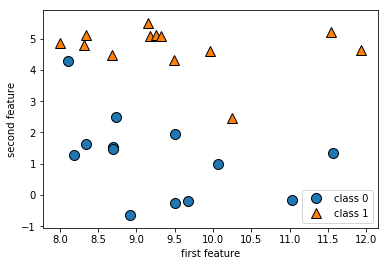

In [3]:
# 데이터셋 생성
X, y = mglearn.datasets.make_forge()
# 산점도 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["class 0", "class 1"], loc=4)
plt.xlabel("first feature")
plt.ylabel("second feature")
print("X.shape: {}".format(X.shape))

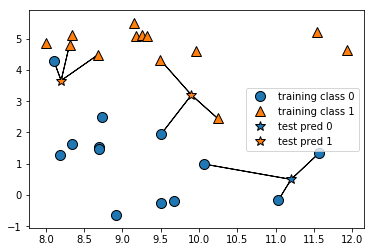

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

# scikit-learn을 이용한 k-최근접 이웃 알고리즘

In [6]:
# training set, test set 분할
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [7]:
# 객체 생성
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [8]:
# training set을 이용하여 분류 모델 학습
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [10]:
# test set 예측
print("test set 예측: {}".format(clf.predict(X_test)))

test set 예측: [1 0 1 0 1 0 0]


In [11]:
# 모델 일반화 정도 평가
print("test set 정확도: {:.2f}".format(clf.score(X_test, y_test)))

test set 정확도: 0.86


## KNeighborsClassifier 분석

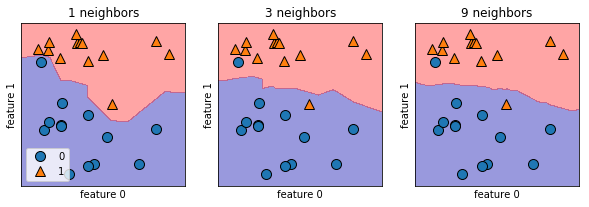

In [17]:
# 결정 경계(decision boundary): 클래스 영역을 나누는 경계
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit() 메서드는 self 객체를 반환한다.
    # 그래서 객체 생성과 fit() 메서드 한 줄에 쓸 수 있다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

# 1 이웃일 때 결정 경계가 training data에 가깝게 따라가고 있다.
# 이웃이 늘어날수록 결정 경계가 더 부드러워진다.
# 부드러운 경계는 더 단순한 모델을 의미
# 즉, 이웃을 적게 사용하면 모델의 복잡도가 높아지고 많이 사용하면 복잡도는 낮아진다.
# 이웃의 수를 training data 전체 개수로 하는 극단적인 경우 training set에서 가장 많은
# data point를 가진 class가 예측값이 된다.

### 모델의 복잡도와 일반화 사이 관계 입증

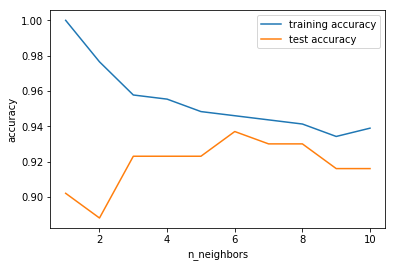

In [22]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1 ~ 10 n_neighbors 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # training set 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy" )
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# 이웃의 수가 적을수록 모델이 복잡해지므로 그래프가 수평으로 뒤집힌 형태
# 이웃의 수가 늘어나면 모델은 단순해지고 training data의 정확도는 줄어듬
# 이웃을 하나 사용한 test set의 정확도는 이웃을 많이 사용했을 때보다 낮다.
# 이것은 1-최근접 이웃이 모델을 너무 복잡하게 만든다는 것을 뜻함
# 반대로 10-최근접 이웃은 모델이 너무 단순해서 정확도는 더 나빠진다.
# 정확도가 가장 좋을 때는 6개 이웃 사용한 경우
# 그래도 그래프의 가장 나쁜 정확도도 88%여서 수긍할만 하다.

# mglearn을 이용한 k-최근접 이웃 회귀

In [ ]:
# k-최근접 이웃 알고리즘은 회귀 분석에도 쓰임
# 여러 개의 최근접 이웃을 사용할 땐 이웃 간 평균이 예측이 됨
mglearn.plots.plot_knn_regression(n_neighbors=3)

# scikit-learn을 이용한 k-최근접 이웃 회귀

In [25]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋 training set, test set 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 3 이웃으로 한 모델의 객체 생성
reg = KNeighborsRegressor(n_neighbors=3)

# training data와 target을 사용하여 모델 학습
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [27]:
# test set 예측
print("test set 예측:\n{}".format(reg.predict(X_test)))

test set 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [28]:
# 모델 평가
# 결정계수 R^2
print("test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

# 모델이 비교적 잘 들어맞음

test set R^2: 0.83


# KNeighborsRegressor 분석

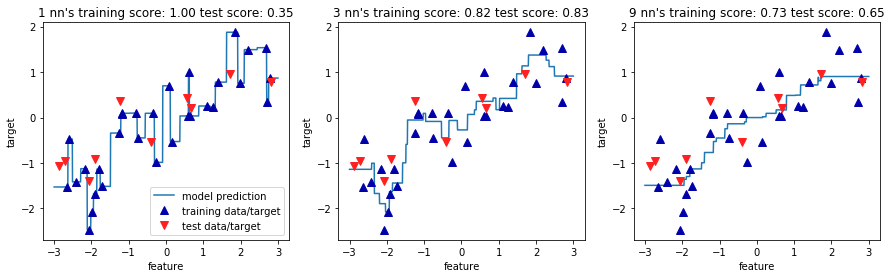

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3 ~ 3 사이에 1,000개 data point 생성
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} nn's training score: {:.2f} test score: {:.2f}".
                format(n_neighbors, reg.score(X_train, y_train), 
                      reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    axes[0].legend(["model prediction", "training data/target", "test data/target"],
                  loc="best")
    
# 1 이웃일 때 training set의 각 data point가 예측에 주는 영향이 커서 예측값이
# training data point를 모두 지나감
# 이는 매우 불안정한 예측을 만들어낸다.
# 이웃을 많이 사용하면 training data에는 잘 안맞을 수 있지만 더 안정된 예측을 얻음

# 장단점과 매개변수

In [38]:
# 일반적으로 KNeighbors 분류기에 중요한 매개변수는 2개
# data point 사이의 거리를 재는 방법, 이웃의 수
# 거리 재는 방법 고르는 문제는 기본적으로 여러 환경에서 잘 작동하는
# 유클리디안 거리 방식 사용

# k-NN 장점
# - 이해하기 매우 쉬운 모델
# - 많이 조정하지 않아도 자주 좋은 성능 발휘

# k-NN 단점
# - 보통 최근접 이웃 모델은 매우 빠르게 만들 수 있지만, 
#   훈련 세트가 매우 크면(특성 수나 샘플 수가 클 경우) 예측이 느려짐
# - k-NN 알고리즘 사용시에는 데이터 전처리 과정 중요
# - (수백 개 이상의) 많은 특성을 가진 데이터셋에는 잘 동작하지 않음
# - 특성 값 대부분이 0인 (즉 희소한) 데이터셋에도 잘 동작하지 않음

# 결론
# k-최근접 이웃 알고리즘은 이해하긴 쉽지만, 예측이 느리고 
# 많은 특성을 처리하는 능력이 부족해 현업에서는 잘 쓰지 않는다.
# 이런 단점이 없는 알고리즘은 선형 모델